# 🚗 EV Adoption Forecasting - Week 1

## 📌 Problem Statement
As electric vehicle (EV) adoption surges, urban planners need to anticipate infrastructure needs—especially charging stations. Inadequate planning can lead to bottlenecks, impacting user satisfaction and sustainability goals.

## 🎯 Goal
Analyze historical EV adoption trends, preprocess the data, detect outliers, and visualize key patterns to lay the foundation for forecasting models.

## 📂 Dataset Details
- **Date:** Monthly vehicle registration (2017–2024)
- **County:** Geographic region
- **Battery Electric Vehicles (BEVs):** Fully electric vehicles
- **Plug-In Hybrid Electric Vehicles (PHEVs):** Partially electric vehicles
- **EV Total:** Sum of BEVs and PHEVs
- **Non-EV Total:** All other vehicles
- **Percent EVs:** Percentage of EVs among all vehicles


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization style
sns.set(style="whitegrid")


## 🔹 Step 1: Load the Dataset
We start by loading the EV population dataset and checking its structure.


In [15]:
# Load dataset
file_path = "cleaned_ev_data.csv"  # Change path if needed
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (20733, 60)


,Date,County,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year,Month,...,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WY
0,2022-09-30,Riverside,7,0,7,460,467,1.50,2022,9,...,False,False,False,False,False,False,False,False,False,False
1,2022-12-31,Prince William,1,2,3,188,191,1.57,2022,12,...,False,False,False,False,False,False,True,False,False,False
2,2020-01-31,Dakota,0,1,1,32,33,3.03,2020,1,...,False,False,False,False,False,False,False,False,False,False
3,2022-06-30,Ferry,0,0,0,3575,3575,0.00,2022,6,...,False,False,False,False,False,False,False,True,False,False
4,2021-07-31,Douglas,0,1,1,83,84,1.19,2021,7,...,False,False,False,False,False,False,False,False,False,False


## 🔹 Step 2: Dataset Information & Missing Values
We inspect data types and identify missing values.


In [16]:
df.info()

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20733 entries, 0 to 20732
Data columns (total 60 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20733 non-null  object 
 1   County                                    20733 non-null  object 
 2   Battery Electric Vehicles (BEVs)          20733 non-null  int64  
 3   Plug-In Hybrid Electric Vehicles (PHEVs)  20733 non-null  int64  
 4   Electric Vehicle (EV) Total               20733 non-null  int64  
 5   Non-Electric Vehicle Total                20733 non-null  int64  
 6   Total Vehicles                            20733 non-null  int64  
 7   Percent Electric Vehicles                 20733 non-null  float64
 8   Year                                      20733 non-null  int64  
 9   Month                                     20733 non-null  int64  
 10  Vehicle Primary Use_Truck         

## 🔹 Step 3: Data Preprocessing
- Convert `Date` to datetime format  
- Handle missing values (numeric → median, categorical → mode)  
- Extract `Year` and `Month` for future analysis  


In [17]:
# 🔹 Step 3: Data Preprocessing
# --------------------------------------------

# 1. Convert 'Date' column to datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 2. Handle missing numeric values with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 3. Handle missing categorical values with mode (Fixed Warning)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 4. Extract Year and Month from Date
if 'Date' in df.columns:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

print("\n✅ After Preprocessing:")
df.head()



✅ After Preprocessing:


,Date,County,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year,Month,...,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WY
0,2022-09-30,Riverside,7,0,7,460,467,1.50,2022,9,...,False,False,False,False,False,False,False,False,False,False
1,2022-12-31,Prince William,1,2,3,188,191,1.57,2022,12,...,False,False,False,False,False,False,True,False,False,False
2,2020-01-31,Dakota,0,1,1,32,33,3.03,2020,1,...,False,False,False,False,False,False,False,False,False,False
3,2022-06-30,Ferry,0,0,0,3575,3575,0.00,2022,6,...,False,False,False,False,False,False,False,True,False,False
4,2021-07-31,Douglas,0,1,1,83,84,1.19,2021,7,...,False,False,False,False,False,False,False,False,False,False


## 🔹 Step 4: Outlier Detection (EV Total)
We use the IQR method to detect outliers and visualize them using a boxplot.


Number of Outliers in EV Total: 3813


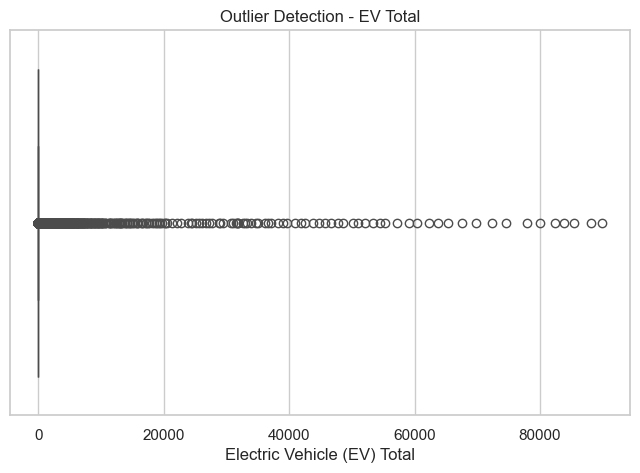

In [18]:
if 'Electric Vehicle (EV) Total' in df.columns:
    Q1 = df['Electric Vehicle (EV) Total'].quantile(0.25)
    Q3 = df['Electric Vehicle (EV) Total'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df['Electric Vehicle (EV) Total'] < lower_bound) | (df['Electric Vehicle (EV) Total'] > upper_bound)]
    print(f"Number of Outliers in EV Total: {len(outliers)}")

    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Electric Vehicle (EV) Total'])
    plt.title('Outlier Detection - EV Total')
    plt.show()


## 🔹 Step 5: EV Adoption Trend Over Time
We analyze how EV adoption has evolved over the years.


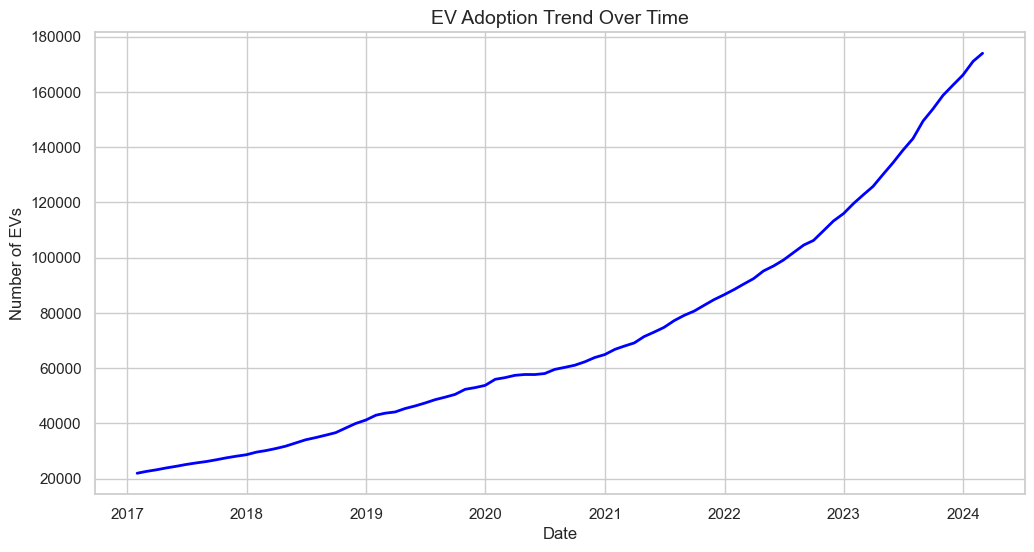

In [19]:
if 'Date' in df.columns:
    monthly_trend = df.groupby('Date')['Electric Vehicle (EV) Total'].sum()

    plt.figure(figsize=(12,6))
    plt.plot(monthly_trend.index, monthly_trend.values, color='blue', linewidth=2)
    plt.title('EV Adoption Trend Over Time', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Number of EVs')
    plt.grid(True)
    plt.show()


## 🔹 Step 6: Top 10 Counties by EV Count
Identifying which counties have the highest EV adoption.


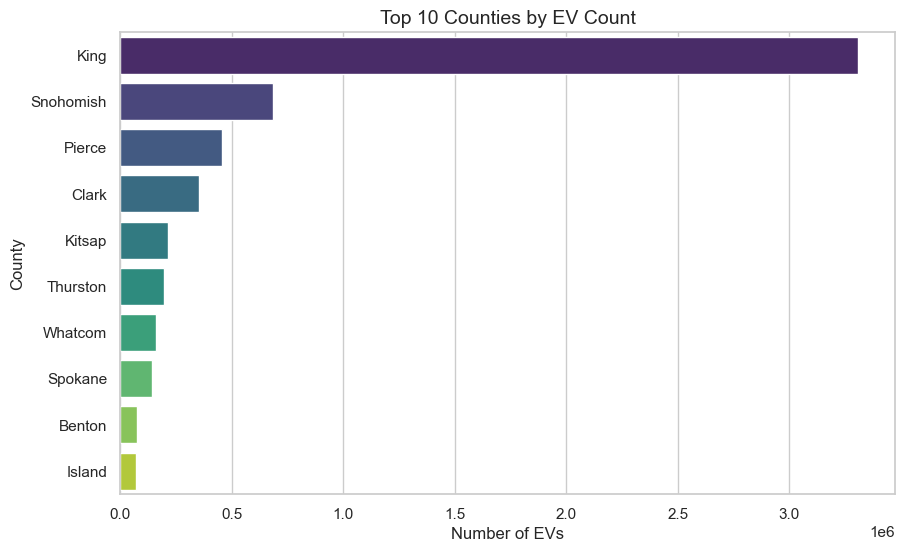

In [20]:
if 'County' in df.columns:
    county_ev = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,6))
    sns.barplot(x=county_ev.values, y=county_ev.index, hue=county_ev.index, palette='viridis', legend=False)
    plt.title('Top 10 Counties by EV Count', fontsize=14)
    plt.xlabel('Number of EVs')
    plt.ylabel('County')
    plt.show()


## 🔹 Step 7: BEVs vs PHEVs Trend
Compare adoption patterns of Battery Electric Vehicles vs Plug-In Hybrid Electric Vehicles.


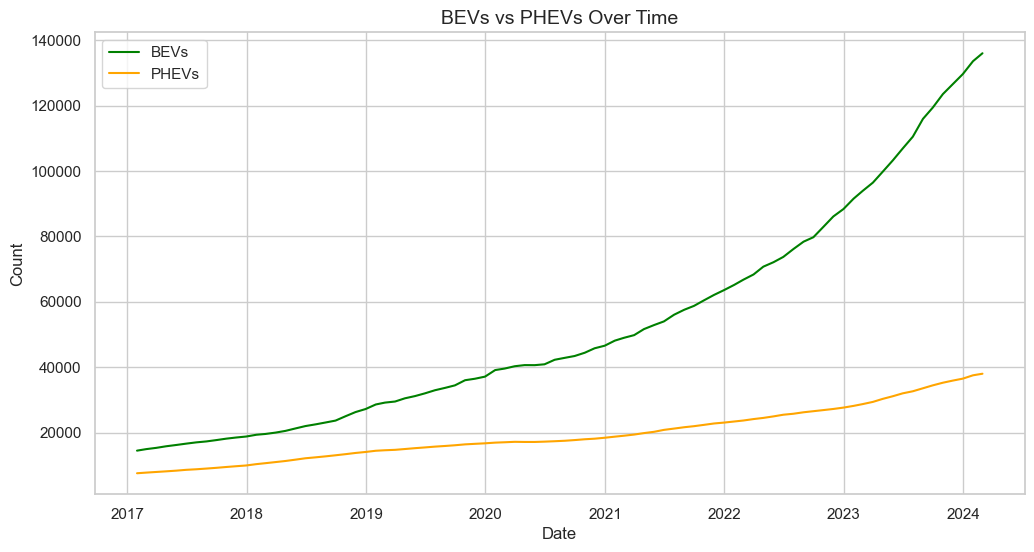

In [21]:
if {'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Date'}.issubset(df.columns):
    bevs_trend = df.groupby('Date')['Battery Electric Vehicles (BEVs)'].sum()
    phevs_trend = df.groupby('Date')['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()

    plt.figure(figsize=(12,6))
    plt.plot(bevs_trend.index, bevs_trend.values, label='BEVs', color='green')
    plt.plot(phevs_trend.index, phevs_trend.values, label='PHEVs', color='orange')
    plt.title('BEVs vs PHEVs Over Time', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()


# ⚡ Week 2: Electric Vehicle Demand Forecasting using Trained Model

Welcome to Week 2 of the EV demand prediction internship!  
In this phase, we will load our trained machine learning model and preprocessed dataset to forecast electric vehicle demand across various regions.

---

## 🔧 Step 1: Load Required Libraries
We begin by importing necessary libraries.



Here, we import the essential Python libraries:
            'pandas' for working with tabular data.
            'joblib' to load our previously trained forecasting model.

In [22]:
import pandas as pd
import joblib  # use joblib instead of pickle


## 🤖 Step 2: Load the Trained Forecasting Model
We now load our trained model that we saved as `forecasting_ev_model.pkl`.



In [23]:
# Load the trained model
model = joblib.load("forecasting_ev_model.pkl")



## 📂 Step 3: Load the Preprocessed Dataset
We load the `preprocessed_ev_

In [24]:
# Load preprocessed data
data = pd.read_csv("preprocessed_ev_data.csv")
data.head()


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2018-05-31,Ada,ID,Passenger,0.0,2.0,2.0,341.0,343.0,0.58,...,0,5,2.0,2.0,2.0,2.0,0.0,0.0,10.0,1.857143
1,2018-06-30,Ada,ID,Passenger,0.0,2.0,2.0,332.0,334.0,0.60,...,0,6,2.0,2.0,2.0,2.0,0.0,0.0,12.0,2.000000
2,2018-07-31,Ada,ID,Passenger,0.0,2.0,2.0,329.0,331.0,0.60,...,0,7,2.0,2.0,2.0,2.0,0.0,0.0,14.0,2.000000
3,2018-08-31,Ada,ID,Passenger,0.0,2.0,2.0,325.0,327.0,0.61,...,0,8,2.0,2.0,2.0,2.0,0.0,0.0,16.0,2.000000
4,2018-09-30,Ada,ID,Passenger,0.0,2.0,2.0,327.0,329.0,0.61,...,0,9,2.0,2.0,2.0,2.0,0.0,0.0,18.0,2.000000


## 📈 Step 4: Prepare the Data for Prediction
Here we assume that the dataset is ready and already has only the required features for the model.  
If needed, you can manually select or drop columns.  
Make sure not to include the target/output column during prediction.

In [25]:
# Drop unused columns
X = data.drop(['County', 'State', 'Date', 'Electric Vehicle (EV) Total', 'Vehicle Primary Use'], axis=1)



## 📊 Step 5: Make Predictions
We will now use the model to predict the demand for Electric Vehicles.


In [26]:
# Make predictions
predictions = model.predict(X)

# Convert to DataFrame
predicted_df = pd.DataFrame(predictions, columns=["Predicted_EV_Demand"])

# Combine with original data
result_df = pd.concat([data.reset_index(drop=True), predicted_df], axis=1)

# Show sample
result_df.head()


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope,Predicted_EV_Demand
0,2018-05-31,Ada,ID,Passenger,0.0,2.0,2.0,341.0,343.0,0.58,...,5,2.0,2.0,2.0,2.0,0.0,0.0,10.0,1.857143,2.0
1,2018-06-30,Ada,ID,Passenger,0.0,2.0,2.0,332.0,334.0,0.60,...,6,2.0,2.0,2.0,2.0,0.0,0.0,12.0,2.000000,2.0
2,2018-07-31,Ada,ID,Passenger,0.0,2.0,2.0,329.0,331.0,0.60,...,7,2.0,2.0,2.0,2.0,0.0,0.0,14.0,2.000000,2.0
3,2018-08-31,Ada,ID,Passenger,0.0,2.0,2.0,325.0,327.0,0.61,...,8,2.0,2.0,2.0,2.0,0.0,0.0,16.0,2.000000,2.0
4,2018-09-30,Ada,ID,Passenger,0.0,2.0,2.0,327.0,329.0,0.61,...,9,2.0,2.0,2.0,2.0,0.0,0.0,18.0,2.000000,2.0


In [27]:
# Let's assume you want to make predictions using all available data
predictions = model.predict(X)

# Add the predictions as a new column in the dataframe
data['Predicted_EV_Demand'] = predictions

# Display the top 5 results
data[['Predicted_EV_Demand']].head()


,Predicted_EV_Demand
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


## 📦 Step 6: Attach Predictions to the Original Data (Optional)
For visualization or saving purposes, we can append the predictions to the original dataset.


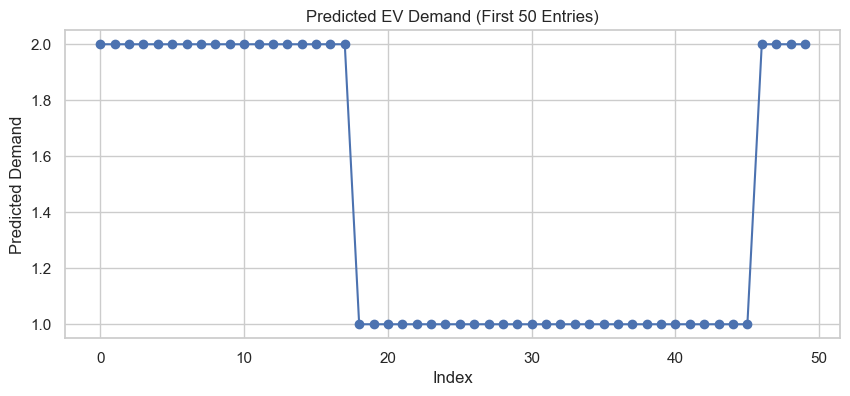

In [28]:
import matplotlib.pyplot as plt

# Plot first 50 predictions
plt.figure(figsize=(10, 4))
plt.plot(data['Predicted_EV_Demand'][:50], marker='o')
plt.title("Predicted EV Demand (First 50 Entries)")
plt.xlabel("Index")
plt.ylabel("Predicted Demand")
plt.grid(True)
plt.show()


## ✅ Step 7: Evaluate Model Performance

If we have actual values for comparison, we can compute evaluation metrics such as MAE, RMSE to measure the accuracy.


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# If actual values exist
if 'Actual_EV_Demand' in data.columns:
    mae = mean_absolute_error(data['Actual_EV_Demand'], data['Predicted_EV_Demand'])
    rmse = np.sqrt(mean_squared_error(data['Actual_EV_Demand'], data['Predicted_EV_Demand']))
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")


In [30]:
# Export the final dataframe with predictions
data.to_csv("ev_demand_predictions.csv", index=False)
print("✅ Predictions saved to 'ev_demand_predictions.csv'")


✅ Predictions saved to 'ev_demand_predictions.csv'


## ✅ Conclusion
- We successfully loaded and used a machine learning model trained in Week 1.
- The model has predicted electric vehicle demand across all entries in the dataset.
- This file now contains both your input features and the predicted EV population demand.

You can now upload:
- This updated `.ipynb` file
- `forecasting_ev_model.pkl`
- `preprocessed_ev_data.csv`

to your GitHub repo and submit the repo link to LMS ✅
